In [22]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt
from pywt import wavedec

In [23]:
# dataset_path = "data/training/"

In [24]:
# header = 'filename'
# for i in range(1, 41):
#   header += f' mfcc{i}'
# header += ' label'
# header = header.split()

In [25]:
# file = open('data_1.csv', 'w', newline='')
# with file:
#   writer = csv.writer(file)
#   writer.writerow(header)

# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:
#           semantic_label = dirpath.split("/")[-1]
#           print("\nProcessing: {}".format(semantic_label))
#           for f in filenames:
#               file_path = os.path.join(dirpath, f)
#               to_append = f'{file_path}'
#               # print(file_path)
#               y, sr = librosa.load(file_path, mono=True, duration=3, sr=8000)
#               mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
#               for e in mfcc:
#                   to_append += f' {np.mean(e.T, axis=0)}'
#               to_append += f' {semantic_label}'
#               file = open('data_1.csv', 'a', newline='')
#               with file:
#                   writer = csv.writer(file)
#                   writer.writerow(to_append.split())

In [26]:
# data = pd.read_csv('../data_mfccRMScqt.csv')
data = pd.read_csv('../Preprocessing/db5/data_mfccDWTcqtdb5L1.csv')
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT/MR/New_MR_013.wav,-495.158142,-17.699718,1.995417,-6.560966,-0.151382,4.404518,-3.197990,1.378374,-0.059363,...,0.000343,0.000522,0.000572,0.000530,0.000578,0.000603,0.000621,0.000530,0.000486,MR
1,../data/DWT/MR/New_MR_174.wav,-548.711731,-35.574787,12.506323,-3.259351,1.374236,1.946338,-2.657305,1.942204,-0.956127,...,0.000278,0.000360,0.000325,0.000276,0.000352,0.000282,0.000268,0.000338,0.000349,MR
2,../data/DWT/MR/New_MR_182.wav,-551.774353,-34.949604,14.678288,-2.625841,-3.152858,-3.667840,1.138761,1.216005,-2.939780,...,0.000313,0.000400,0.000332,0.000252,0.000278,0.000266,0.000260,0.000282,0.000211,MR
3,../data/DWT/MR/New_MR_005.wav,-484.838928,-17.331890,0.794573,-6.355471,0.096363,5.741897,1.160718,2.086056,0.705592,...,0.000467,0.000522,0.000531,0.000648,0.000765,0.000556,0.000651,0.000867,0.000646,MR
4,../data/DWT/MR/New_MR_067.wav,-543.766052,-36.516781,12.567668,-2.045451,2.803391,3.578267,-2.691306,2.837240,1.323356,...,0.000254,0.000236,0.000313,0.000332,0.000355,0.000361,0.000309,0.000317,0.000343,MR


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 103 entries, filename to label
dtypes: float64(101), object(2)
memory usage: 804.8+ KB


In [28]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [29]:
X.shape

(1000, 101)

In [30]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [31]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-495.158142,-17.699718,1.995417,-6.560966,-0.151382,4.404518,-3.197990,1.378374,-0.059363,-1.130225,...,0.000473,0.000343,0.000522,0.000572,0.000530,0.000578,0.000603,0.000621,0.000530,0.000486
1,-548.711731,-35.574787,12.506323,-3.259351,1.374236,1.946338,-2.657305,1.942204,-0.956127,-2.049379,...,0.000290,0.000278,0.000360,0.000325,0.000276,0.000352,0.000282,0.000268,0.000338,0.000349
2,-551.774353,-34.949604,14.678288,-2.625841,-3.152858,-3.667840,1.138761,1.216005,-2.939780,0.393365,...,0.000180,0.000313,0.000400,0.000332,0.000252,0.000278,0.000266,0.000260,0.000282,0.000211
3,-484.838928,-17.331890,0.794573,-6.355471,0.096363,5.741897,1.160718,2.086056,0.705592,-0.802245,...,0.000580,0.000467,0.000522,0.000531,0.000648,0.000765,0.000556,0.000651,0.000867,0.000646
4,-543.766052,-36.516781,12.567668,-2.045451,2.803391,3.578267,-2.691306,2.837240,1.323356,1.769056,...,0.000237,0.000254,0.000236,0.000313,0.000332,0.000355,0.000361,0.000309,0.000317,0.000343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-405.726990,-77.300079,13.942502,4.767124,-1.656976,-2.802324,0.184631,2.351334,-2.018372,4.045334,...,0.000747,0.000729,0.000598,0.000523,0.000645,0.000703,0.000661,0.000784,0.000714,0.000734
996,-388.875153,-78.687134,14.147832,3.051652,-1.846769,-0.447980,2.758378,-0.398919,-3.622700,1.690781,...,0.000820,0.000976,0.001012,0.001132,0.001267,0.001487,0.001432,0.001562,0.001584,0.001305
997,-535.572510,-37.654732,11.200865,-0.888963,-0.640530,2.987886,0.732820,2.676649,-2.635229,-1.924914,...,0.000215,0.000201,0.000223,0.000249,0.000249,0.000231,0.000196,0.000271,0.000256,0.000222
998,-507.304382,-28.481316,10.688545,0.405298,-1.481764,5.094982,0.307274,0.223016,-0.549139,-2.330604,...,0.000251,0.000317,0.000314,0.000221,0.000288,0.000378,0.000398,0.000361,0.000272,0.000316


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
y_test.shape

(200,)

In [34]:
X_train.shape

(800, 101)

In [35]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
29,-571.000305,-44.529331,8.557463,-5.354973,-0.444946,0.775353,-3.911644,-0.161377,-0.040204,-0.763672,...,0.000156,0.000183,0.000165,0.000170,0.000233,0.000188,0.000118,0.000173,0.000226,0.000225
535,-546.471436,-21.875593,7.981214,-1.554237,-2.442505,-0.280991,3.010110,-1.707507,-0.782117,-4.404325,...,0.000182,0.000162,0.000160,0.000179,0.000178,0.000173,0.000203,0.000208,0.000116,0.000134
695,-483.048645,-35.087589,3.334061,0.057829,-2.300550,-0.083517,-2.038794,2.419527,-1.354680,-1.581535,...,0.000549,0.000583,0.000651,0.000712,0.000808,0.000555,0.000406,0.000411,0.000455,0.000639
557,-612.470886,-26.888533,13.136589,-3.096690,-0.632893,-0.204262,1.073217,0.608695,2.258817,0.773053,...,0.000137,0.000124,0.000122,0.000114,0.000074,0.000058,0.000074,0.000087,0.000041,0.000102
836,-488.692200,-40.434914,18.709089,-5.685947,-0.671774,-0.475641,-1.842119,1.419811,-0.200171,-0.360520,...,0.000283,0.000252,0.000250,0.000239,0.000267,0.000296,0.000285,0.000274,0.000279,0.000314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-555.877991,-42.176857,14.207497,-4.525305,0.835319,0.281500,-3.061442,-0.741886,-1.151715,-0.392564,...,0.000222,0.000188,0.000213,0.000206,0.000192,0.000231,0.000227,0.000215,0.000203,0.000256
270,-609.207642,-11.152511,1.870600,-3.416370,1.308998,3.316016,-1.200858,1.639898,-0.514021,-0.540516,...,0.000178,0.000236,0.000217,0.000155,0.000210,0.000136,0.000154,0.000218,0.000222,0.000213
860,-606.614502,-17.670940,8.634387,-5.587108,-0.084813,1.902464,1.920007,5.127586,-2.719897,0.581622,...,0.000146,0.000114,0.000184,0.000157,0.000191,0.000217,0.000161,0.000141,0.000162,0.000155
435,-533.061646,-29.820217,4.227546,1.623833,-1.713859,-4.619459,3.864091,-0.920375,1.959889,-1.475473,...,0.000248,0.000259,0.000216,0.000263,0.000339,0.000338,0.000261,0.000196,0.000220,0.000175


In [36]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200,)
(800, 101, 1)
(200, 101, 1)


In [37]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [38]:
X_train.shape[1], X_train.shape[2]

(101, 1)

In [39]:
def build_model(dropout_rate=0):
    model = models.Sequential(
        [
            tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
            tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),

            tf.keras.layers.Flatten(),
            # tf.keras.layers.LSTM(64, return_sequences=False),
            tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
            
            tf.keras.layers.BatchNormalization(),


            tf.keras.layers.Dense(5, activation='softmax')
        ]
    )
    # optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [40]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 101, 64)           16896     
                                                                 
 dense_8 (Dense)             (None, 101, 32)           2080      
                                                                 
 flatten_2 (Flatten)         (None, 3232)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                206912    
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_2 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                      

In [41]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import keras

# modeltuning=KerasClassifier(build_fn=build_model)
modeltuning=KerasClassifier(model=build_model,optimizer="adam",
                                      loss=keras.losses.categorical_crossentropy,
                                      batch_size=8,
                                      epochs=100,
                                      verbose=1,
                                      metrics=['accuracy'],
                                      validation_split=0.1)

params={
        'batch_size': [16, 32, 64],
        'epochs':[10, 20, 30, 40, 50],
        }
gs=GridSearchCV(estimator=modeltuning, param_grid=params, cv=10, verbose=1, scoring='balanced_accuracy')
# now fit the dataset to the GridSearchCV object. 
gs = gs.fit(X, y, validation_data=(X_test, y_test))

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 31ms/step - loss: 1.4303 - accuracy: 0.3867 - val_loss: 1.6178 - val_accuracy: 0.2050
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1609 - accuracy: 0.5578 - val_loss: 1.5347 - val_accuracy: 0.3950
Epoch 3/10
57/57 [==============================] - 1s 23ms/step - loss: 1.0529 - accuracy: 0.5956 - val_loss: 1.4758 - val_accuracy: 0.3250
Epoch 4/10
57/57 [==============================] - 1s 24ms/step - loss: 0.9710 - accuracy: 0.6400 - val_loss: 1.3247 - val_accuracy: 0.4800
Epoch 5/10
57/57 [==============================] - 1s 23ms/step - loss: 0.9044 - accuracy: 0.6756 - val_loss: 1.2180 - val_accuracy: 0.5600
Epoch 6/10
57/57 [==============================] - 1s 23ms/step - loss: 0.8441 - accuracy: 0.6833 - val_loss: 1.0085 - val_accuracy: 0.6750
Epoch 7/10
57/57 [==============================] - 1s 23ms/step - loss: 0.7951 - accuracy: 0.6978 - val_loss: 0.8461 - val_accuracy: 0.7750
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 32ms/step - loss: 1.3889 - accuracy: 0.4367 - val_loss: 1.5638 - val_accuracy: 0.3350
Epoch 2/10
57/57 [==============================] - 1s 25ms/step - loss: 1.1451 - accuracy: 0.5622 - val_loss: 1.5562 - val_accuracy: 0.4050
Epoch 3/10
57/57 [==============================] - 1s 24ms/step - loss: 1.0785 - accuracy: 0.5900 - val_loss: 1.4675 - val_accuracy: 0.2300
Epoch 4/10
57/57 [==============================] - 1s 23ms/step - loss: 1.0047 - accuracy: 0.6167 - val_loss: 1.3186 - val_accuracy: 0.6100
Epoch 5/10
57/57 [==============================] - 1s 24ms/step - loss: 0.9591 - accuracy: 0.6378 - val_loss: 1.2742 - val_accuracy: 0.5250
Epoch 6/10
57/57 [==============================] - 1s 25ms/step - loss: 0.9011 - accuracy: 0.6600 - val_loss: 1.0614 - val_accuracy: 0.6300
Epoch 7/10
57/57 [==============================] - 1s 26ms/step - loss: 0.8687 - accuracy: 0.6778 - val_loss: 0.9574 - val_accuracy: 0.6950
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 31ms/step - loss: 1.3640 - accuracy: 0.4422 - val_loss: 1.5971 - val_accuracy: 0.3600
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1508 - accuracy: 0.5578 - val_loss: 1.6186 - val_accuracy: 0.1850
Epoch 3/10
57/57 [==============================] - 1s 23ms/step - loss: 1.0890 - accuracy: 0.5822 - val_loss: 1.5035 - val_accuracy: 0.3400
Epoch 4/10
57/57 [==============================] - 1s 23ms/step - loss: 1.0156 - accuracy: 0.6167 - val_loss: 1.5415 - val_accuracy: 0.2100
Epoch 5/10
57/57 [==============================] - 1s 23ms/step - loss: 0.9731 - accuracy: 0.6344 - val_loss: 1.2778 - val_accuracy: 0.4950
Epoch 6/10
57/57 [==============================] - 1s 23ms/step - loss: 0.8919 - accuracy: 0.6667 - val_loss: 1.3118 - val_accuracy: 0.4250
Epoch 7/10
57/57 [==============================] - 1s 23ms/step - loss: 0.8786 - accuracy: 0.6633 - val_loss: 1.0967 - val_accuracy: 0.5850
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 30ms/step - loss: 1.3387 - accuracy: 0.4578 - val_loss: 1.5672 - val_accuracy: 0.2900
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1417 - accuracy: 0.5511 - val_loss: 1.4942 - val_accuracy: 0.2950
Epoch 3/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0645 - accuracy: 0.5856 - val_loss: 1.3955 - val_accuracy: 0.4450
Epoch 4/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0106 - accuracy: 0.6311 - val_loss: 1.2887 - val_accuracy: 0.6500
Epoch 5/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9562 - accuracy: 0.6433 - val_loss: 1.1227 - val_accuracy: 0.6400
Epoch 6/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9135 - accuracy: 0.6489 - val_loss: 1.2959 - val_accuracy: 0.4100
Epoch 7/10
57/57 [==============================] - 1s 22ms/step - loss: 0.8617 - accuracy: 0.6711 - val_loss: 1.1114 - val_accuracy: 0.5400
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 30ms/step - loss: 1.3575 - accuracy: 0.4356 - val_loss: 1.5862 - val_accuracy: 0.2850
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1633 - accuracy: 0.5522 - val_loss: 1.5456 - val_accuracy: 0.2000
Epoch 3/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0828 - accuracy: 0.5733 - val_loss: 1.3885 - val_accuracy: 0.6000
Epoch 4/10
57/57 [==============================] - 1s 23ms/step - loss: 1.0179 - accuracy: 0.6011 - val_loss: 1.3174 - val_accuracy: 0.5350
Epoch 5/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9529 - accuracy: 0.6422 - val_loss: 1.1690 - val_accuracy: 0.6350
Epoch 6/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9292 - accuracy: 0.6533 - val_loss: 1.1769 - val_accuracy: 0.4700
Epoch 7/10
57/57 [==============================] - 1s 22ms/step - loss: 0.8909 - accuracy: 0.6622 - val_loss: 0.9477 - val_accuracy: 0.6500
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 30ms/step - loss: 1.3921 - accuracy: 0.4389 - val_loss: 1.5706 - val_accuracy: 0.3000
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1649 - accuracy: 0.5644 - val_loss: 1.4809 - val_accuracy: 0.3200
Epoch 3/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0578 - accuracy: 0.5900 - val_loss: 1.3683 - val_accuracy: 0.5650
Epoch 4/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9851 - accuracy: 0.6333 - val_loss: 1.2775 - val_accuracy: 0.6200
Epoch 5/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9629 - accuracy: 0.6278 - val_loss: 1.3306 - val_accuracy: 0.3350
Epoch 6/10
57/57 [==============================] - 1s 22ms/step - loss: 0.8898 - accuracy: 0.6744 - val_loss: 1.2495 - val_accuracy: 0.4950
Epoch 7/10
57/57 [==============================] - 1s 23ms/step - loss: 0.8765 - accuracy: 0.6689 - val_loss: 0.9555 - val_accuracy: 0.7050
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 30ms/step - loss: 1.3403 - accuracy: 0.4422 - val_loss: 1.5624 - val_accuracy: 0.3300
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1027 - accuracy: 0.5678 - val_loss: 1.5249 - val_accuracy: 0.2950
Epoch 3/10
57/57 [==============================] - 1s 23ms/step - loss: 1.0965 - accuracy: 0.5722 - val_loss: 1.4438 - val_accuracy: 0.3400
Epoch 4/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0109 - accuracy: 0.6056 - val_loss: 1.3360 - val_accuracy: 0.5050
Epoch 5/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9251 - accuracy: 0.6389 - val_loss: 1.2366 - val_accuracy: 0.4900
Epoch 6/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9042 - accuracy: 0.6533 - val_loss: 1.0922 - val_accuracy: 0.5850
Epoch 7/10
57/57 [==============================] - 1s 22ms/step - loss: 0.8429 - accuracy: 0.6744 - val_loss: 1.0022 - val_accuracy: 0.5600
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 30ms/step - loss: 1.4524 - accuracy: 0.3956 - val_loss: 1.5644 - val_accuracy: 0.2700
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1846 - accuracy: 0.5411 - val_loss: 1.5034 - val_accuracy: 0.3100
Epoch 3/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0845 - accuracy: 0.5844 - val_loss: 1.4061 - val_accuracy: 0.5050
Epoch 4/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0287 - accuracy: 0.6189 - val_loss: 1.3417 - val_accuracy: 0.3400
Epoch 5/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9629 - accuracy: 0.6289 - val_loss: 1.1731 - val_accuracy: 0.6200
Epoch 6/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9388 - accuracy: 0.6500 - val_loss: 1.1279 - val_accuracy: 0.5400
Epoch 7/10
57/57 [==============================] - 1s 23ms/step - loss: 0.8747 - accuracy: 0.7011 - val_loss: 0.9393 - val_accuracy: 0.6800
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 30ms/step - loss: 1.3596 - accuracy: 0.4544 - val_loss: 1.5442 - val_accuracy: 0.2700
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1315 - accuracy: 0.5711 - val_loss: 1.4795 - val_accuracy: 0.4650
Epoch 3/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0469 - accuracy: 0.5956 - val_loss: 1.4704 - val_accuracy: 0.3250
Epoch 4/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0151 - accuracy: 0.6200 - val_loss: 1.3371 - val_accuracy: 0.5850
Epoch 5/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9494 - accuracy: 0.6500 - val_loss: 1.2300 - val_accuracy: 0.5900
Epoch 6/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9042 - accuracy: 0.6689 - val_loss: 1.0545 - val_accuracy: 0.6500
Epoch 7/10
57/57 [==============================] - 1s 22ms/step - loss: 0.8350 - accuracy: 0.7000 - val_loss: 1.1187 - val_accuracy: 0.5600
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
57/57 [==============================] - 4s 30ms/step - loss: 1.4152 - accuracy: 0.4078 - val_loss: 1.5790 - val_accuracy: 0.2400
Epoch 2/10
57/57 [==============================] - 1s 22ms/step - loss: 1.1346 - accuracy: 0.5744 - val_loss: 1.4999 - val_accuracy: 0.3200
Epoch 3/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0674 - accuracy: 0.5956 - val_loss: 1.4422 - val_accuracy: 0.3950
Epoch 4/10
57/57 [==============================] - 1s 22ms/step - loss: 1.0159 - accuracy: 0.6189 - val_loss: 1.3421 - val_accuracy: 0.3900
Epoch 5/10
57/57 [==============================] - 1s 22ms/step - loss: 0.9592 - accuracy: 0.6344 - val_loss: 1.3265 - val_accuracy: 0.3400
Epoch 6/10
57/57 [==============================] - 1s 23ms/step - loss: 0.9333 - accuracy: 0.6544 - val_loss: 1.1823 - val_accuracy: 0.5000
Epoch 7/10
57/57 [==============================] - 1s 22ms/step - loss: 0.8842 - accuracy: 0.6711 - val_loss: 1.3704 - val_accuracy: 0.3450
Epoch 8/10
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 4s 30ms/step - loss: 1.3876 - accuracy: 0.4278 - val_loss: 1.5926 - val_accuracy: 0.2750
Epoch 2/20
57/57 [==============================] - 1s 22ms/step - loss: 1.1310 - accuracy: 0.5400 - val_loss: 1.5121 - val_accuracy: 0.3450
Epoch 3/20
57/57 [==============================] - 1s 22ms/step - loss: 1.0549 - accuracy: 0.6067 - val_loss: 1.4755 - val_accuracy: 0.3000
Epoch 4/20
57/57 [==============================] - 1s 22ms/step - loss: 1.0464 - accuracy: 0.6089 - val_loss: 1.3579 - val_accuracy: 0.4550
Epoch 5/20
57/57 [==============================] - 1s 22ms/step - loss: 0.9463 - accuracy: 0.6467 - val_loss: 1.1867 - val_accuracy: 0.5550
Epoch 6/20
57/57 [==============================] - 1s 22ms/step - loss: 0.8775 - accuracy: 0.6722 - val_loss: 1.1552 - val_accuracy: 0.5300
Epoch 7/20
57/57 [==============================] - 1s 22ms/step - loss: 0.8494 - accuracy: 0.6778 - val_loss: 1.1206 - val_accuracy: 0.5050
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 5s 33ms/step - loss: 1.3851 - accuracy: 0.4478 - val_loss: 1.5582 - val_accuracy: 0.2500
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 1.1427 - accuracy: 0.5744 - val_loss: 1.4718 - val_accuracy: 0.4950
Epoch 3/20
57/57 [==============================] - 1s 24ms/step - loss: 1.0454 - accuracy: 0.6133 - val_loss: 1.3914 - val_accuracy: 0.3900
Epoch 4/20
57/57 [==============================] - 1s 24ms/step - loss: 0.9861 - accuracy: 0.6333 - val_loss: 1.2744 - val_accuracy: 0.5650
Epoch 5/20
57/57 [==============================] - 1s 24ms/step - loss: 0.9509 - accuracy: 0.6556 - val_loss: 1.3157 - val_accuracy: 0.3200
Epoch 6/20
57/57 [==============================] - 1s 25ms/step - loss: 0.8903 - accuracy: 0.6811 - val_loss: 1.2804 - val_accuracy: 0.4250
Epoch 7/20
57/57 [==============================] - 1s 24ms/step - loss: 0.8525 - accuracy: 0.6867 - val_loss: 0.9229 - val_accuracy: 0.6900
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 4s 33ms/step - loss: 1.3622 - accuracy: 0.4333 - val_loss: 1.5625 - val_accuracy: 0.2800
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 1.1146 - accuracy: 0.5744 - val_loss: 1.5466 - val_accuracy: 0.3150
Epoch 3/20
57/57 [==============================] - 1s 24ms/step - loss: 1.0556 - accuracy: 0.5856 - val_loss: 1.4579 - val_accuracy: 0.3800
Epoch 4/20
57/57 [==============================] - 1s 24ms/step - loss: 0.9909 - accuracy: 0.6289 - val_loss: 1.4508 - val_accuracy: 0.3650
Epoch 5/20
57/57 [==============================] - 1s 25ms/step - loss: 0.9471 - accuracy: 0.6467 - val_loss: 1.2251 - val_accuracy: 0.5800
Epoch 6/20
57/57 [==============================] - 1s 24ms/step - loss: 0.8556 - accuracy: 0.6833 - val_loss: 1.0869 - val_accuracy: 0.5900
Epoch 7/20
57/57 [==============================] - 1s 24ms/step - loss: 0.8528 - accuracy: 0.6811 - val_loss: 1.6306 - val_accuracy: 0.2800
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 4s 33ms/step - loss: 1.3739 - accuracy: 0.4311 - val_loss: 1.5694 - val_accuracy: 0.3150
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 1.1743 - accuracy: 0.5456 - val_loss: 1.4781 - val_accuracy: 0.5800
Epoch 3/20
57/57 [==============================] - 1s 24ms/step - loss: 1.0822 - accuracy: 0.6000 - val_loss: 1.5156 - val_accuracy: 0.3250
Epoch 4/20
57/57 [==============================] - 1s 24ms/step - loss: 1.0348 - accuracy: 0.6033 - val_loss: 1.3732 - val_accuracy: 0.3650
Epoch 5/20
57/57 [==============================] - 1s 25ms/step - loss: 0.9783 - accuracy: 0.6311 - val_loss: 1.2229 - val_accuracy: 0.5000
Epoch 6/20
57/57 [==============================] - 1s 24ms/step - loss: 0.9261 - accuracy: 0.6500 - val_loss: 1.1402 - val_accuracy: 0.6200
Epoch 7/20
57/57 [==============================] - 1s 24ms/step - loss: 0.8719 - accuracy: 0.6733 - val_loss: 0.9762 - val_accuracy: 0.6550
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 4s 32ms/step - loss: 1.4583 - accuracy: 0.3967 - val_loss: 1.5639 - val_accuracy: 0.2600
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 1.1847 - accuracy: 0.5489 - val_loss: 1.4859 - val_accuracy: 0.4450
Epoch 3/20
57/57 [==============================] - 1s 23ms/step - loss: 1.1074 - accuracy: 0.5789 - val_loss: 1.5279 - val_accuracy: 0.2050
Epoch 4/20
57/57 [==============================] - 1s 25ms/step - loss: 1.0132 - accuracy: 0.6078 - val_loss: 1.4012 - val_accuracy: 0.2650
Epoch 5/20
57/57 [==============================] - 1s 24ms/step - loss: 0.9697 - accuracy: 0.6344 - val_loss: 1.1149 - val_accuracy: 0.6600
Epoch 6/20
57/57 [==============================] - 1s 24ms/step - loss: 0.9057 - accuracy: 0.6700 - val_loss: 1.0631 - val_accuracy: 0.6100
Epoch 7/20
57/57 [==============================] - 1s 24ms/step - loss: 0.8751 - accuracy: 0.6711 - val_loss: 1.0020 - val_accuracy: 0.6900
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 4s 33ms/step - loss: 1.4609 - accuracy: 0.3722 - val_loss: 1.5556 - val_accuracy: 0.2900
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 1.1676 - accuracy: 0.5556 - val_loss: 1.5050 - val_accuracy: 0.3650
Epoch 3/20
57/57 [==============================] - 1s 25ms/step - loss: 1.0926 - accuracy: 0.5911 - val_loss: 1.4838 - val_accuracy: 0.4400
Epoch 4/20
57/57 [==============================] - 1s 26ms/step - loss: 1.0152 - accuracy: 0.6133 - val_loss: 1.2977 - val_accuracy: 0.6500
Epoch 5/20
57/57 [==============================] - 1s 24ms/step - loss: 0.9547 - accuracy: 0.6556 - val_loss: 1.2227 - val_accuracy: 0.4750
Epoch 6/20
57/57 [==============================] - 1s 25ms/step - loss: 0.9381 - accuracy: 0.6356 - val_loss: 1.0024 - val_accuracy: 0.7000
Epoch 7/20
57/57 [==============================] - 1s 22ms/step - loss: 0.8485 - accuracy: 0.6733 - val_loss: 1.0205 - val_accuracy: 0.6400
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 4s 32ms/step - loss: 1.4059 - accuracy: 0.4222 - val_loss: 1.5732 - val_accuracy: 0.3600
Epoch 2/20
57/57 [==============================] - 1s 25ms/step - loss: 1.1293 - accuracy: 0.5467 - val_loss: 1.4950 - val_accuracy: 0.2350
Epoch 3/20
57/57 [==============================] - 1s 24ms/step - loss: 1.0538 - accuracy: 0.6122 - val_loss: 1.3718 - val_accuracy: 0.5500
Epoch 4/20
57/57 [==============================] - 1s 23ms/step - loss: 1.0180 - accuracy: 0.6111 - val_loss: 1.2063 - val_accuracy: 0.6700
Epoch 5/20
57/57 [==============================] - 1s 23ms/step - loss: 0.9550 - accuracy: 0.6411 - val_loss: 1.1934 - val_accuracy: 0.5350
Epoch 6/20
57/57 [==============================] - 1s 23ms/step - loss: 0.8778 - accuracy: 0.6767 - val_loss: 1.1362 - val_accuracy: 0.5300
Epoch 7/20
57/57 [==============================] - 1s 25ms/step - loss: 0.8660 - accuracy: 0.6789 - val_loss: 0.8888 - val_accuracy: 0.7600
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 4s 32ms/step - loss: 1.4080 - accuracy: 0.4022 - val_loss: 1.5799 - val_accuracy: 0.3200
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 1.1490 - accuracy: 0.5422 - val_loss: 1.4875 - val_accuracy: 0.3300
Epoch 3/20
57/57 [==============================] - 1s 24ms/step - loss: 1.0362 - accuracy: 0.5956 - val_loss: 1.4332 - val_accuracy: 0.4950
Epoch 4/20
57/57 [==============================] - 1s 23ms/step - loss: 0.9578 - accuracy: 0.6356 - val_loss: 1.3401 - val_accuracy: 0.4650
Epoch 5/20
57/57 [==============================] - 1s 23ms/step - loss: 0.9061 - accuracy: 0.6411 - val_loss: 1.1954 - val_accuracy: 0.6250
Epoch 6/20
57/57 [==============================] - 1s 24ms/step - loss: 0.8846 - accuracy: 0.6744 - val_loss: 1.2241 - val_accuracy: 0.4300
Epoch 7/20
57/57 [==============================] - 1s 24ms/step - loss: 0.8560 - accuracy: 0.6767 - val_loss: 1.0769 - val_accuracy: 0.5550
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 4s 32ms/step - loss: 1.3983 - accuracy: 0.4311 - val_loss: 1.5747 - val_accuracy: 0.2450
Epoch 2/20
57/57 [==============================] - 1s 24ms/step - loss: 1.1747 - accuracy: 0.5289 - val_loss: 1.4886 - val_accuracy: 0.3500
Epoch 3/20
57/57 [==============================] - 1s 24ms/step - loss: 1.0795 - accuracy: 0.5956 - val_loss: 1.3969 - val_accuracy: 0.4350
Epoch 4/20
57/57 [==============================] - 1s 25ms/step - loss: 1.0142 - accuracy: 0.6133 - val_loss: 1.3626 - val_accuracy: 0.4600
Epoch 5/20
57/57 [==============================] - 1s 24ms/step - loss: 0.9463 - accuracy: 0.6444 - val_loss: 1.3267 - val_accuracy: 0.4500
Epoch 6/20
57/57 [==============================] - 2s 30ms/step - loss: 0.9176 - accuracy: 0.6556 - val_loss: 1.2776 - val_accuracy: 0.4600
Epoch 7/20
57/57 [==============================] - 2s 31ms/step - loss: 0.8783 - accuracy: 0.6711 - val_loss: 1.0881 - val_accuracy: 0.5600
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
57/57 [==============================] - 5s 37ms/step - loss: 1.3915 - accuracy: 0.4267 - val_loss: 1.5083 - val_accuracy: 0.3700
Epoch 2/20
57/57 [==============================] - 2s 28ms/step - loss: 1.1403 - accuracy: 0.5700 - val_loss: 1.4415 - val_accuracy: 0.4550
Epoch 3/20
57/57 [==============================] - 2s 29ms/step - loss: 1.0774 - accuracy: 0.5867 - val_loss: 1.3634 - val_accuracy: 0.5350
Epoch 4/20
57/57 [==============================] - 2s 28ms/step - loss: 1.0191 - accuracy: 0.6189 - val_loss: 1.2669 - val_accuracy: 0.6000
Epoch 5/20
57/57 [==============================] - 2s 30ms/step - loss: 0.9907 - accuracy: 0.6411 - val_loss: 1.3228 - val_accuracy: 0.3100
Epoch 6/20
57/57 [==============================] - 1s 25ms/step - loss: 0.9129 - accuracy: 0.6600 - val_loss: 1.1380 - val_accuracy: 0.5300
Epoch 7/20
57/57 [==============================] - 1s 24ms/step - loss: 0.8670 - accuracy: 0.6822 - val_loss: 1.1136 - val_accuracy: 0.5800
Epoch 8/20
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 32ms/step - loss: 1.4152 - accuracy: 0.4011 - val_loss: 1.5543 - val_accuracy: 0.2000
Epoch 2/30
57/57 [==============================] - 1s 26ms/step - loss: 1.1505 - accuracy: 0.5600 - val_loss: 1.5073 - val_accuracy: 0.4200
Epoch 3/30
57/57 [==============================] - 1s 24ms/step - loss: 1.0698 - accuracy: 0.5989 - val_loss: 1.4561 - val_accuracy: 0.3850
Epoch 4/30
57/57 [==============================] - 1s 25ms/step - loss: 1.0422 - accuracy: 0.6022 - val_loss: 1.2786 - val_accuracy: 0.6650
Epoch 5/30
57/57 [==============================] - 1s 25ms/step - loss: 0.9438 - accuracy: 0.6322 - val_loss: 1.1712 - val_accuracy: 0.6550
Epoch 6/30
57/57 [==============================] - 1s 24ms/step - loss: 0.9220 - accuracy: 0.6489 - val_loss: 1.0831 - val_accuracy: 0.6600
Epoch 7/30
57/57 [==============================] - 1s 25ms/step - loss: 0.8470 - accuracy: 0.6822 - val_loss: 0.9542 - val_accuracy: 0.7300
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 33ms/step - loss: 1.3830 - accuracy: 0.4267 - val_loss: 1.5516 - val_accuracy: 0.1900
Epoch 2/30
57/57 [==============================] - 1s 25ms/step - loss: 1.1306 - accuracy: 0.5767 - val_loss: 1.4914 - val_accuracy: 0.4050
Epoch 3/30
57/57 [==============================] - 1s 25ms/step - loss: 1.0647 - accuracy: 0.6033 - val_loss: 1.4630 - val_accuracy: 0.3800
Epoch 4/30
57/57 [==============================] - 1s 25ms/step - loss: 1.0062 - accuracy: 0.6344 - val_loss: 1.2949 - val_accuracy: 0.5300
Epoch 5/30
57/57 [==============================] - 1s 24ms/step - loss: 0.9462 - accuracy: 0.6511 - val_loss: 1.2004 - val_accuracy: 0.6200
Epoch 6/30
57/57 [==============================] - 1s 24ms/step - loss: 0.8981 - accuracy: 0.6744 - val_loss: 1.1690 - val_accuracy: 0.4400
Epoch 7/30
57/57 [==============================] - 1s 24ms/step - loss: 0.8413 - accuracy: 0.6944 - val_loss: 1.1235 - val_accuracy: 0.6000
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 33ms/step - loss: 1.3598 - accuracy: 0.4167 - val_loss: 1.5585 - val_accuracy: 0.2800
Epoch 2/30
57/57 [==============================] - 1s 24ms/step - loss: 1.1698 - accuracy: 0.5444 - val_loss: 1.5113 - val_accuracy: 0.2500
Epoch 3/30
57/57 [==============================] - 1s 25ms/step - loss: 1.0605 - accuracy: 0.6056 - val_loss: 1.4855 - val_accuracy: 0.2400
Epoch 4/30
57/57 [==============================] - 1s 25ms/step - loss: 1.0041 - accuracy: 0.6322 - val_loss: 1.3337 - val_accuracy: 0.4150
Epoch 5/30
57/57 [==============================] - 1s 24ms/step - loss: 0.9387 - accuracy: 0.6578 - val_loss: 1.2058 - val_accuracy: 0.6550
Epoch 6/30
57/57 [==============================] - 1s 24ms/step - loss: 0.9122 - accuracy: 0.6389 - val_loss: 1.4722 - val_accuracy: 0.3300
Epoch 7/30
57/57 [==============================] - 1s 24ms/step - loss: 0.9022 - accuracy: 0.6833 - val_loss: 1.4691 - val_accuracy: 0.3200
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 5s 31ms/step - loss: 1.3558 - accuracy: 0.4400 - val_loss: 1.5228 - val_accuracy: 0.2900
Epoch 2/30
57/57 [==============================] - 1s 23ms/step - loss: 1.1307 - accuracy: 0.5644 - val_loss: 1.5156 - val_accuracy: 0.2550
Epoch 3/30
57/57 [==============================] - 1s 23ms/step - loss: 1.0659 - accuracy: 0.5911 - val_loss: 1.4012 - val_accuracy: 0.3750
Epoch 4/30
57/57 [==============================] - 1s 23ms/step - loss: 1.0084 - accuracy: 0.6289 - val_loss: 1.3435 - val_accuracy: 0.5300
Epoch 5/30
57/57 [==============================] - 1s 26ms/step - loss: 0.9239 - accuracy: 0.6556 - val_loss: 1.3516 - val_accuracy: 0.2700
Epoch 6/30
57/57 [==============================] - 1s 25ms/step - loss: 0.9389 - accuracy: 0.6444 - val_loss: 1.2471 - val_accuracy: 0.4650
Epoch 7/30
57/57 [==============================] - 1s 25ms/step - loss: 0.9084 - accuracy: 0.6767 - val_loss: 1.0090 - val_accuracy: 0.6700
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 31ms/step - loss: 1.3693 - accuracy: 0.4456 - val_loss: 1.5721 - val_accuracy: 0.1750
Epoch 2/30
57/57 [==============================] - 1s 23ms/step - loss: 1.1342 - accuracy: 0.5567 - val_loss: 1.5282 - val_accuracy: 0.1850
Epoch 3/30
57/57 [==============================] - 1s 22ms/step - loss: 1.0836 - accuracy: 0.5656 - val_loss: 1.4300 - val_accuracy: 0.5450
Epoch 4/30
57/57 [==============================] - 1s 23ms/step - loss: 1.0189 - accuracy: 0.6233 - val_loss: 1.2680 - val_accuracy: 0.5750
Epoch 5/30
57/57 [==============================] - 1s 23ms/step - loss: 0.9906 - accuracy: 0.6267 - val_loss: 1.2401 - val_accuracy: 0.5000
Epoch 6/30
57/57 [==============================] - 1s 23ms/step - loss: 0.9101 - accuracy: 0.6267 - val_loss: 1.2443 - val_accuracy: 0.3350
Epoch 7/30
57/57 [==============================] - 1s 23ms/step - loss: 0.9132 - accuracy: 0.6689 - val_loss: 0.9825 - val_accuracy: 0.6450
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 31ms/step - loss: 1.3904 - accuracy: 0.4400 - val_loss: 1.5932 - val_accuracy: 0.1850
Epoch 2/30
57/57 [==============================] - 1s 23ms/step - loss: 1.1563 - accuracy: 0.5411 - val_loss: 1.5728 - val_accuracy: 0.2800
Epoch 3/30
57/57 [==============================] - 1s 22ms/step - loss: 1.0707 - accuracy: 0.5944 - val_loss: 1.5348 - val_accuracy: 0.2200
Epoch 4/30
57/57 [==============================] - 1s 23ms/step - loss: 1.0125 - accuracy: 0.6044 - val_loss: 1.3071 - val_accuracy: 0.5800
Epoch 5/30
57/57 [==============================] - 1s 22ms/step - loss: 1.0021 - accuracy: 0.6389 - val_loss: 1.3644 - val_accuracy: 0.4200
Epoch 6/30
57/57 [==============================] - 1s 23ms/step - loss: 0.9629 - accuracy: 0.6244 - val_loss: 1.1857 - val_accuracy: 0.5250
Epoch 7/30
57/57 [==============================] - 1s 22ms/step - loss: 0.8959 - accuracy: 0.6522 - val_loss: 1.0430 - val_accuracy: 0.5950
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 31ms/step - loss: 1.4413 - accuracy: 0.4033 - val_loss: 1.6164 - val_accuracy: 0.3000
Epoch 2/30
57/57 [==============================] - 1s 23ms/step - loss: 1.1375 - accuracy: 0.5733 - val_loss: 1.4792 - val_accuracy: 0.2500
Epoch 3/30
57/57 [==============================] - 1s 23ms/step - loss: 1.0674 - accuracy: 0.6144 - val_loss: 1.4615 - val_accuracy: 0.2750
Epoch 4/30
57/57 [==============================] - 1s 23ms/step - loss: 0.9945 - accuracy: 0.6244 - val_loss: 1.2794 - val_accuracy: 0.5950
Epoch 5/30
57/57 [==============================] - 1s 22ms/step - loss: 0.9542 - accuracy: 0.6411 - val_loss: 1.2974 - val_accuracy: 0.4400
Epoch 6/30
57/57 [==============================] - 1s 23ms/step - loss: 0.9268 - accuracy: 0.6478 - val_loss: 1.1832 - val_accuracy: 0.5450
Epoch 7/30
57/57 [==============================] - 1s 23ms/step - loss: 0.8633 - accuracy: 0.6867 - val_loss: 0.9638 - val_accuracy: 0.6500
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 31ms/step - loss: 1.3709 - accuracy: 0.4211 - val_loss: 1.5552 - val_accuracy: 0.2100
Epoch 2/30
57/57 [==============================] - 1s 24ms/step - loss: 1.1437 - accuracy: 0.5622 - val_loss: 1.5071 - val_accuracy: 0.3100
Epoch 3/30
57/57 [==============================] - 1s 22ms/step - loss: 1.0526 - accuracy: 0.5700 - val_loss: 1.4168 - val_accuracy: 0.5200
Epoch 4/30
57/57 [==============================] - 1s 22ms/step - loss: 0.9719 - accuracy: 0.6178 - val_loss: 1.3259 - val_accuracy: 0.5750
Epoch 5/30
57/57 [==============================] - 1s 22ms/step - loss: 0.9153 - accuracy: 0.6489 - val_loss: 1.2226 - val_accuracy: 0.5950
Epoch 6/30
57/57 [==============================] - 1s 22ms/step - loss: 0.8825 - accuracy: 0.6733 - val_loss: 1.2262 - val_accuracy: 0.4850
Epoch 7/30
57/57 [==============================] - 1s 23ms/step - loss: 0.8562 - accuracy: 0.6689 - val_loss: 1.0995 - val_accuracy: 0.5350
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 29ms/step - loss: 1.4037 - accuracy: 0.4022 - val_loss: 1.5571 - val_accuracy: 0.1900
Epoch 2/30
57/57 [==============================] - 1s 22ms/step - loss: 1.1342 - accuracy: 0.5811 - val_loss: 1.5090 - val_accuracy: 0.3050
Epoch 3/30
57/57 [==============================] - 1s 22ms/step - loss: 1.0294 - accuracy: 0.6067 - val_loss: 1.4499 - val_accuracy: 0.2950
Epoch 4/30
57/57 [==============================] - 1s 23ms/step - loss: 0.9507 - accuracy: 0.6378 - val_loss: 1.3124 - val_accuracy: 0.5500
Epoch 5/30
57/57 [==============================] - 1s 22ms/step - loss: 0.9102 - accuracy: 0.6556 - val_loss: 1.1947 - val_accuracy: 0.5800
Epoch 6/30
57/57 [==============================] - 1s 22ms/step - loss: 0.8812 - accuracy: 0.6744 - val_loss: 1.3453 - val_accuracy: 0.4250
Epoch 7/30
57/57 [==============================] - 1s 22ms/step - loss: 0.8457 - accuracy: 0.6800 - val_loss: 2.5819 - val_accuracy: 0.2500
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
57/57 [==============================] - 4s 30ms/step - loss: 1.4486 - accuracy: 0.4033 - val_loss: 1.5844 - val_accuracy: 0.3450
Epoch 2/30
57/57 [==============================] - 1s 22ms/step - loss: 1.1518 - accuracy: 0.5556 - val_loss: 1.5832 - val_accuracy: 0.3300
Epoch 3/30
57/57 [==============================] - 1s 22ms/step - loss: 1.0701 - accuracy: 0.6000 - val_loss: 1.4372 - val_accuracy: 0.3900
Epoch 4/30
57/57 [==============================] - 1s 22ms/step - loss: 0.9970 - accuracy: 0.6322 - val_loss: 1.3416 - val_accuracy: 0.4250
Epoch 5/30
57/57 [==============================] - 1s 22ms/step - loss: 0.9356 - accuracy: 0.6556 - val_loss: 1.2928 - val_accuracy: 0.4700
Epoch 6/30
57/57 [==============================] - 1s 22ms/step - loss: 0.9077 - accuracy: 0.6789 - val_loss: 1.1145 - val_accuracy: 0.5350
Epoch 7/30
57/57 [==============================] - 1s 22ms/step - loss: 0.8439 - accuracy: 0.6944 - val_loss: 1.0981 - val_accuracy: 0.6000
Epoch 8/30
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 5s 31ms/step - loss: 1.3637 - accuracy: 0.4233 - val_loss: 1.5444 - val_accuracy: 0.2400
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1549 - accuracy: 0.5400 - val_loss: 1.5102 - val_accuracy: 0.2950
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0584 - accuracy: 0.5856 - val_loss: 1.4348 - val_accuracy: 0.4600
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0155 - accuracy: 0.6133 - val_loss: 1.4208 - val_accuracy: 0.3350
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9330 - accuracy: 0.6511 - val_loss: 1.2844 - val_accuracy: 0.5350
Epoch 6/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8833 - accuracy: 0.6767 - val_loss: 1.1623 - val_accuracy: 0.5400
Epoch 7/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8415 - accuracy: 0.6856 - val_loss: 1.2154 - val_accuracy: 0.4850
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 4s 30ms/step - loss: 1.3812 - accuracy: 0.4267 - val_loss: 1.5762 - val_accuracy: 0.2700
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1263 - accuracy: 0.5567 - val_loss: 1.4870 - val_accuracy: 0.4000
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0296 - accuracy: 0.6156 - val_loss: 1.4305 - val_accuracy: 0.4450
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9489 - accuracy: 0.6511 - val_loss: 1.3238 - val_accuracy: 0.5600
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9133 - accuracy: 0.6511 - val_loss: 1.2775 - val_accuracy: 0.4600
Epoch 6/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8678 - accuracy: 0.6867 - val_loss: 1.1608 - val_accuracy: 0.4600
Epoch 7/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8315 - accuracy: 0.7022 - val_loss: 1.1005 - val_accuracy: 0.5300
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 4s 29ms/step - loss: 1.4394 - accuracy: 0.3900 - val_loss: 1.5621 - val_accuracy: 0.3050
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.2135 - accuracy: 0.5400 - val_loss: 1.4916 - val_accuracy: 0.3050
Epoch 3/40
57/57 [==============================] - 1s 23ms/step - loss: 1.1056 - accuracy: 0.5833 - val_loss: 1.4455 - val_accuracy: 0.3550
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9940 - accuracy: 0.6322 - val_loss: 1.3194 - val_accuracy: 0.5300
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9363 - accuracy: 0.6367 - val_loss: 1.2070 - val_accuracy: 0.5300
Epoch 6/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8961 - accuracy: 0.6689 - val_loss: 1.1391 - val_accuracy: 0.5800
Epoch 7/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8104 - accuracy: 0.6978 - val_loss: 0.9041 - val_accuracy: 0.7300
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 4s 30ms/step - loss: 1.3978 - accuracy: 0.4122 - val_loss: 1.5248 - val_accuracy: 0.4050
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1517 - accuracy: 0.5411 - val_loss: 1.4901 - val_accuracy: 0.5350
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0631 - accuracy: 0.5778 - val_loss: 1.4192 - val_accuracy: 0.4800
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0043 - accuracy: 0.6100 - val_loss: 1.3759 - val_accuracy: 0.3300
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9664 - accuracy: 0.6211 - val_loss: 1.2582 - val_accuracy: 0.4700
Epoch 6/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9095 - accuracy: 0.6578 - val_loss: 1.1634 - val_accuracy: 0.5850
Epoch 7/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8131 - accuracy: 0.7056 - val_loss: 0.9389 - val_accuracy: 0.7150
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 4s 30ms/step - loss: 1.3812 - accuracy: 0.4344 - val_loss: 1.5977 - val_accuracy: 0.2200
Epoch 2/40
57/57 [==============================] - 1s 23ms/step - loss: 1.1201 - accuracy: 0.5700 - val_loss: 1.5394 - val_accuracy: 0.4050
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0253 - accuracy: 0.6244 - val_loss: 1.4277 - val_accuracy: 0.4450
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9562 - accuracy: 0.6400 - val_loss: 1.3538 - val_accuracy: 0.4450
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9088 - accuracy: 0.6533 - val_loss: 1.2242 - val_accuracy: 0.5300
Epoch 6/40
57/57 [==============================] - 1s 23ms/step - loss: 0.8592 - accuracy: 0.6944 - val_loss: 1.0506 - val_accuracy: 0.6600
Epoch 7/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8341 - accuracy: 0.6867 - val_loss: 1.1858 - val_accuracy: 0.5150
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 4s 30ms/step - loss: 1.3972 - accuracy: 0.4211 - val_loss: 1.5746 - val_accuracy: 0.3900
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1619 - accuracy: 0.5500 - val_loss: 1.5595 - val_accuracy: 0.3750
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0684 - accuracy: 0.5889 - val_loss: 1.4760 - val_accuracy: 0.3900
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9806 - accuracy: 0.6133 - val_loss: 1.3792 - val_accuracy: 0.4700
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9058 - accuracy: 0.6578 - val_loss: 1.1989 - val_accuracy: 0.5350
Epoch 6/40
57/57 [==============================] - 1s 23ms/step - loss: 0.8698 - accuracy: 0.6700 - val_loss: 1.0345 - val_accuracy: 0.6700
Epoch 7/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8207 - accuracy: 0.7000 - val_loss: 0.9317 - val_accuracy: 0.7700
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 4s 30ms/step - loss: 1.4037 - accuracy: 0.4367 - val_loss: 1.5966 - val_accuracy: 0.2500
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1179 - accuracy: 0.5822 - val_loss: 1.5098 - val_accuracy: 0.2000
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0273 - accuracy: 0.6133 - val_loss: 1.5047 - val_accuracy: 0.2450
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9748 - accuracy: 0.6400 - val_loss: 1.3666 - val_accuracy: 0.5050
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9418 - accuracy: 0.6500 - val_loss: 1.3677 - val_accuracy: 0.3900
Epoch 6/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8930 - accuracy: 0.6756 - val_loss: 1.1345 - val_accuracy: 0.6400
Epoch 7/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8556 - accuracy: 0.6667 - val_loss: 1.2031 - val_accuracy: 0.4450
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 4s 29ms/step - loss: 1.4543 - accuracy: 0.3956 - val_loss: 1.5618 - val_accuracy: 0.3300
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1884 - accuracy: 0.5389 - val_loss: 1.5085 - val_accuracy: 0.3900
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0848 - accuracy: 0.5944 - val_loss: 1.4344 - val_accuracy: 0.3650
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0311 - accuracy: 0.6211 - val_loss: 1.3632 - val_accuracy: 0.4650
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9848 - accuracy: 0.6322 - val_loss: 1.2555 - val_accuracy: 0.5000
Epoch 6/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9354 - accuracy: 0.6511 - val_loss: 1.4410 - val_accuracy: 0.3100
Epoch 7/40
57/57 [==============================] - 1s 23ms/step - loss: 0.8997 - accuracy: 0.6589 - val_loss: 1.0060 - val_accuracy: 0.6500
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 5s 31ms/step - loss: 1.4002 - accuracy: 0.4178 - val_loss: 1.5456 - val_accuracy: 0.2700
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1603 - accuracy: 0.5744 - val_loss: 1.5172 - val_accuracy: 0.3950
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0620 - accuracy: 0.6044 - val_loss: 1.4726 - val_accuracy: 0.3150
Epoch 4/40
57/57 [==============================] - 1s 23ms/step - loss: 0.9802 - accuracy: 0.6400 - val_loss: 1.2901 - val_accuracy: 0.7000
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9271 - accuracy: 0.6622 - val_loss: 1.2581 - val_accuracy: 0.5000
Epoch 6/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8614 - accuracy: 0.6700 - val_loss: 1.0913 - val_accuracy: 0.5650
Epoch 7/40
57/57 [==============================] - 1s 22ms/step - loss: 0.8065 - accuracy: 0.6867 - val_loss: 0.9001 - val_accuracy: 0.7200
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/40
57/57 [==============================] - 4s 30ms/step - loss: 1.4059 - accuracy: 0.4022 - val_loss: 1.6074 - val_accuracy: 0.3250
Epoch 2/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1677 - accuracy: 0.5378 - val_loss: 1.5250 - val_accuracy: 0.1800
Epoch 3/40
57/57 [==============================] - 1s 22ms/step - loss: 1.1127 - accuracy: 0.5700 - val_loss: 1.5147 - val_accuracy: 0.3350
Epoch 4/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0167 - accuracy: 0.6189 - val_loss: 1.3925 - val_accuracy: 0.3650
Epoch 5/40
57/57 [==============================] - 1s 22ms/step - loss: 1.0073 - accuracy: 0.6044 - val_loss: 1.5096 - val_accuracy: 0.2600
Epoch 6/40
57/57 [==============================] - 1s 22ms/step - loss: 0.9450 - accuracy: 0.6544 - val_loss: 1.4887 - val_accuracy: 0.3200
Epoch 7/40
57/57 [==============================] - 1s 23ms/step - loss: 0.8780 - accuracy: 0.6700 - val_loss: 1.0255 - val_accuracy: 0.6650
Epoch 8/40
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 30ms/step - loss: 1.3764 - accuracy: 0.4189 - val_loss: 1.5700 - val_accuracy: 0.2400
Epoch 2/50
57/57 [==============================] - 1s 22ms/step - loss: 1.1716 - accuracy: 0.5489 - val_loss: 1.5312 - val_accuracy: 0.3950
Epoch 3/50
57/57 [==============================] - 1s 22ms/step - loss: 1.1026 - accuracy: 0.5767 - val_loss: 1.4471 - val_accuracy: 0.2600
Epoch 4/50
57/57 [==============================] - 1s 22ms/step - loss: 1.0192 - accuracy: 0.6089 - val_loss: 1.4062 - val_accuracy: 0.4500
Epoch 5/50
57/57 [==============================] - 1s 22ms/step - loss: 0.9906 - accuracy: 0.6300 - val_loss: 1.3094 - val_accuracy: 0.3950
Epoch 6/50
57/57 [==============================] - 1s 22ms/step - loss: 0.9089 - accuracy: 0.6578 - val_loss: 1.1090 - val_accuracy: 0.6050
Epoch 7/50
57/57 [==============================] - 1s 22ms/step - loss: 0.8497 - accuracy: 0.6900 - val_loss: 0.9233 - val_accuracy: 0.7000
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 30ms/step - loss: 1.4134 - accuracy: 0.4111 - val_loss: 1.5653 - val_accuracy: 0.2750
Epoch 2/50
57/57 [==============================] - 1s 23ms/step - loss: 1.1280 - accuracy: 0.5689 - val_loss: 1.4995 - val_accuracy: 0.3450
Epoch 3/50
57/57 [==============================] - 1s 22ms/step - loss: 1.0207 - accuracy: 0.6178 - val_loss: 1.4166 - val_accuracy: 0.3900
Epoch 4/50
57/57 [==============================] - 1s 22ms/step - loss: 0.9376 - accuracy: 0.6500 - val_loss: 1.3827 - val_accuracy: 0.4550
Epoch 5/50
57/57 [==============================] - 1s 22ms/step - loss: 0.8839 - accuracy: 0.6744 - val_loss: 1.1243 - val_accuracy: 0.7050
Epoch 6/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8633 - accuracy: 0.6700 - val_loss: 0.9356 - val_accuracy: 0.7350
Epoch 7/50
57/57 [==============================] - 1s 22ms/step - loss: 0.7944 - accuracy: 0.7078 - val_loss: 1.0628 - val_accuracy: 0.6050
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 30ms/step - loss: 1.3535 - accuracy: 0.4411 - val_loss: 1.5622 - val_accuracy: 0.3000
Epoch 2/50
57/57 [==============================] - 1s 22ms/step - loss: 1.1591 - accuracy: 0.5600 - val_loss: 1.4981 - val_accuracy: 0.3100
Epoch 3/50
57/57 [==============================] - 1s 22ms/step - loss: 1.0485 - accuracy: 0.6056 - val_loss: 1.4441 - val_accuracy: 0.4400
Epoch 4/50
57/57 [==============================] - 1s 22ms/step - loss: 0.9846 - accuracy: 0.6311 - val_loss: 1.2801 - val_accuracy: 0.5900
Epoch 5/50
57/57 [==============================] - 1s 22ms/step - loss: 0.9001 - accuracy: 0.6744 - val_loss: 1.1573 - val_accuracy: 0.5800
Epoch 6/50
57/57 [==============================] - 1s 22ms/step - loss: 0.8653 - accuracy: 0.6767 - val_loss: 1.0930 - val_accuracy: 0.6150
Epoch 7/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8256 - accuracy: 0.7078 - val_loss: 0.9344 - val_accuracy: 0.6950
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 32ms/step - loss: 1.4328 - accuracy: 0.4100 - val_loss: 1.5637 - val_accuracy: 0.3400
Epoch 2/50
57/57 [==============================] - 1s 23ms/step - loss: 1.1729 - accuracy: 0.5656 - val_loss: 1.4989 - val_accuracy: 0.4200
Epoch 3/50
57/57 [==============================] - 1s 23ms/step - loss: 1.0652 - accuracy: 0.6189 - val_loss: 1.4534 - val_accuracy: 0.4050
Epoch 4/50
57/57 [==============================] - 1s 24ms/step - loss: 1.0297 - accuracy: 0.6033 - val_loss: 1.3782 - val_accuracy: 0.3450
Epoch 5/50
57/57 [==============================] - 1s 24ms/step - loss: 0.9518 - accuracy: 0.6433 - val_loss: 1.3659 - val_accuracy: 0.4100
Epoch 6/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9231 - accuracy: 0.6700 - val_loss: 1.2788 - val_accuracy: 0.3850
Epoch 7/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8610 - accuracy: 0.6778 - val_loss: 0.9929 - val_accuracy: 0.7150
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 32ms/step - loss: 1.4365 - accuracy: 0.4011 - val_loss: 1.5216 - val_accuracy: 0.4450
Epoch 2/50
57/57 [==============================] - 1s 23ms/step - loss: 1.1647 - accuracy: 0.5633 - val_loss: 1.4638 - val_accuracy: 0.4700
Epoch 3/50
57/57 [==============================] - 1s 23ms/step - loss: 1.0825 - accuracy: 0.5878 - val_loss: 1.4256 - val_accuracy: 0.3250
Epoch 4/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9993 - accuracy: 0.6256 - val_loss: 1.2225 - val_accuracy: 0.5350
Epoch 5/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9602 - accuracy: 0.6478 - val_loss: 1.1301 - val_accuracy: 0.5700
Epoch 6/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9078 - accuracy: 0.6589 - val_loss: 1.0776 - val_accuracy: 0.5650
Epoch 7/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8748 - accuracy: 0.6733 - val_loss: 0.9789 - val_accuracy: 0.6550
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 31ms/step - loss: 1.3547 - accuracy: 0.4511 - val_loss: 1.5524 - val_accuracy: 0.1900
Epoch 2/50
57/57 [==============================] - 1s 23ms/step - loss: 1.1354 - accuracy: 0.5656 - val_loss: 1.4702 - val_accuracy: 0.5500
Epoch 3/50
57/57 [==============================] - 1s 23ms/step - loss: 1.0695 - accuracy: 0.5800 - val_loss: 1.3851 - val_accuracy: 0.4350
Epoch 4/50
57/57 [==============================] - 1s 23ms/step - loss: 1.0074 - accuracy: 0.5989 - val_loss: 1.2864 - val_accuracy: 0.5650
Epoch 5/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9365 - accuracy: 0.6344 - val_loss: 1.1805 - val_accuracy: 0.6600
Epoch 6/50
57/57 [==============================] - 1s 24ms/step - loss: 0.8635 - accuracy: 0.6856 - val_loss: 1.1159 - val_accuracy: 0.5100
Epoch 7/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8599 - accuracy: 0.6833 - val_loss: 1.1664 - val_accuracy: 0.4800
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 32ms/step - loss: 1.3779 - accuracy: 0.4044 - val_loss: 1.6628 - val_accuracy: 0.1950
Epoch 2/50
57/57 [==============================] - 1s 23ms/step - loss: 1.1763 - accuracy: 0.5500 - val_loss: 1.5574 - val_accuracy: 0.3850
Epoch 3/50
57/57 [==============================] - 1s 24ms/step - loss: 1.0939 - accuracy: 0.5956 - val_loss: 1.4844 - val_accuracy: 0.4200
Epoch 4/50
57/57 [==============================] - 1s 23ms/step - loss: 1.0127 - accuracy: 0.6178 - val_loss: 1.2814 - val_accuracy: 0.5850
Epoch 5/50
57/57 [==============================] - 1s 24ms/step - loss: 0.9654 - accuracy: 0.6411 - val_loss: 1.2442 - val_accuracy: 0.5250
Epoch 6/50
57/57 [==============================] - 1s 24ms/step - loss: 0.9314 - accuracy: 0.6544 - val_loss: 1.0852 - val_accuracy: 0.6800
Epoch 7/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8411 - accuracy: 0.6922 - val_loss: 1.7828 - val_accuracy: 0.3400
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 5s 32ms/step - loss: 1.4012 - accuracy: 0.4178 - val_loss: 1.5400 - val_accuracy: 0.3150
Epoch 2/50
57/57 [==============================] - 1s 24ms/step - loss: 1.1242 - accuracy: 0.5700 - val_loss: 1.4802 - val_accuracy: 0.4050
Epoch 3/50
57/57 [==============================] - 1s 24ms/step - loss: 1.0290 - accuracy: 0.6089 - val_loss: 1.4761 - val_accuracy: 0.3950
Epoch 4/50
57/57 [==============================] - 1s 23ms/step - loss: 1.0159 - accuracy: 0.6056 - val_loss: 1.3095 - val_accuracy: 0.5300
Epoch 5/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9232 - accuracy: 0.6444 - val_loss: 1.2611 - val_accuracy: 0.4650
Epoch 6/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8747 - accuracy: 0.6667 - val_loss: 1.0865 - val_accuracy: 0.6500
Epoch 7/50
57/57 [==============================] - 1s 24ms/step - loss: 0.7976 - accuracy: 0.7100 - val_loss: 0.9962 - val_accuracy: 0.6350
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 30ms/step - loss: 1.3584 - accuracy: 0.4444 - val_loss: 1.5608 - val_accuracy: 0.1950
Epoch 2/50
57/57 [==============================] - 1s 23ms/step - loss: 1.1244 - accuracy: 0.5856 - val_loss: 1.4724 - val_accuracy: 0.4500
Epoch 3/50
57/57 [==============================] - 1s 23ms/step - loss: 1.0215 - accuracy: 0.6133 - val_loss: 1.3835 - val_accuracy: 0.4650
Epoch 4/50
57/57 [==============================] - 1s 22ms/step - loss: 0.9538 - accuracy: 0.6411 - val_loss: 1.2892 - val_accuracy: 0.5450
Epoch 5/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9092 - accuracy: 0.6689 - val_loss: 1.0747 - val_accuracy: 0.6550
Epoch 6/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8538 - accuracy: 0.6789 - val_loss: 1.1966 - val_accuracy: 0.4700
Epoch 7/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8022 - accuracy: 0.6844 - val_loss: 1.0401 - val_accuracy: 0.5800
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
57/57 [==============================] - 4s 31ms/step - loss: 1.3449 - accuracy: 0.4511 - val_loss: 1.5305 - val_accuracy: 0.4450
Epoch 2/50
57/57 [==============================] - 1s 23ms/step - loss: 1.1327 - accuracy: 0.5800 - val_loss: 1.5138 - val_accuracy: 0.1950
Epoch 3/50
57/57 [==============================] - 1s 23ms/step - loss: 1.0734 - accuracy: 0.5900 - val_loss: 1.4213 - val_accuracy: 0.3550
Epoch 4/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9970 - accuracy: 0.6233 - val_loss: 1.4122 - val_accuracy: 0.2600
Epoch 5/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9724 - accuracy: 0.6322 - val_loss: 1.2376 - val_accuracy: 0.4750
Epoch 6/50
57/57 [==============================] - 1s 23ms/step - loss: 0.9205 - accuracy: 0.6556 - val_loss: 1.0484 - val_accuracy: 0.6550
Epoch 7/50
57/57 [==============================] - 1s 23ms/step - loss: 0.8760 - accuracy: 0.6844 - val_loss: 1.4799 - val_accuracy: 0.2650
Epoch 8/50
57

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 3s 43ms/step - loss: 1.4955 - accuracy: 0.3644 - val_loss: 1.6041 - val_accuracy: 0.3650
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.2085 - accuracy: 0.5256 - val_loss: 1.5742 - val_accuracy: 0.2750
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1105 - accuracy: 0.5911 - val_loss: 1.5587 - val_accuracy: 0.2200
Epoch 4/10
29/29 [==============================] - 1s 27ms/step - loss: 1.0387 - accuracy: 0.6111 - val_loss: 1.5028 - val_accuracy: 0.3050
Epoch 5/10
29/29 [==============================] - 1s 27ms/step - loss: 0.9712 - accuracy: 0.6467 - val_loss: 1.4294 - val_accuracy: 0.3550
Epoch 6/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9238 - accuracy: 0.6678 - val_loss: 1.3811 - val_accuracy: 0.3400
Epoch 7/10
29/29 [==============================] - 1s 27ms/step - loss: 0.8497 - accuracy: 0.6900 - val_loss: 1.3309 - val_accuracy: 0.4650
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 3s 43ms/step - loss: 1.3656 - accuracy: 0.4544 - val_loss: 1.5790 - val_accuracy: 0.2000
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0999 - accuracy: 0.5622 - val_loss: 1.5741 - val_accuracy: 0.1950
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0054 - accuracy: 0.6278 - val_loss: 1.5065 - val_accuracy: 0.2100
Epoch 4/10
29/29 [==============================] - 1s 27ms/step - loss: 0.9095 - accuracy: 0.6644 - val_loss: 1.4617 - val_accuracy: 0.2450
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8729 - accuracy: 0.6744 - val_loss: 1.4245 - val_accuracy: 0.2800
Epoch 6/10
29/29 [==============================] - 1s 27ms/step - loss: 0.8147 - accuracy: 0.7167 - val_loss: 1.3355 - val_accuracy: 0.3700
Epoch 7/10
29/29 [==============================] - 1s 27ms/step - loss: 0.7422 - accuracy: 0.7356 - val_loss: 1.2853 - val_accuracy: 0.4900
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 3s 43ms/step - loss: 1.4110 - accuracy: 0.4033 - val_loss: 1.5732 - val_accuracy: 0.2450
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1496 - accuracy: 0.5556 - val_loss: 1.5243 - val_accuracy: 0.5100
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0428 - accuracy: 0.6122 - val_loss: 1.4850 - val_accuracy: 0.4200
Epoch 4/10
29/29 [==============================] - 1s 27ms/step - loss: 1.0007 - accuracy: 0.6300 - val_loss: 1.4288 - val_accuracy: 0.4800
Epoch 5/10
29/29 [==============================] - 1s 27ms/step - loss: 0.9458 - accuracy: 0.6467 - val_loss: 1.3764 - val_accuracy: 0.5700
Epoch 6/10
29/29 [==============================] - 1s 27ms/step - loss: 0.9189 - accuracy: 0.6678 - val_loss: 1.3590 - val_accuracy: 0.4850
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8932 - accuracy: 0.6756 - val_loss: 1.2780 - val_accuracy: 0.5050
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 3s 42ms/step - loss: 1.4225 - accuracy: 0.3756 - val_loss: 1.5524 - val_accuracy: 0.4400
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1656 - accuracy: 0.5600 - val_loss: 1.5117 - val_accuracy: 0.3550
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0933 - accuracy: 0.5989 - val_loss: 1.5472 - val_accuracy: 0.2800
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0424 - accuracy: 0.6322 - val_loss: 1.4258 - val_accuracy: 0.4200
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9930 - accuracy: 0.6356 - val_loss: 1.4198 - val_accuracy: 0.2800
Epoch 6/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9393 - accuracy: 0.6467 - val_loss: 1.3704 - val_accuracy: 0.3150
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8992 - accuracy: 0.6622 - val_loss: 1.2533 - val_accuracy: 0.7000
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 3s 43ms/step - loss: 1.4191 - accuracy: 0.4089 - val_loss: 1.5745 - val_accuracy: 0.3100
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.2006 - accuracy: 0.5489 - val_loss: 1.5387 - val_accuracy: 0.3700
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1047 - accuracy: 0.6011 - val_loss: 1.4961 - val_accuracy: 0.4350
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0572 - accuracy: 0.6122 - val_loss: 1.5089 - val_accuracy: 0.3450
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0067 - accuracy: 0.6322 - val_loss: 1.4515 - val_accuracy: 0.3650
Epoch 6/10
29/29 [==============================] - 1s 29ms/step - loss: 0.9383 - accuracy: 0.6633 - val_loss: 1.3487 - val_accuracy: 0.5550
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8975 - accuracy: 0.6800 - val_loss: 1.2945 - val_accuracy: 0.5300
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 3s 43ms/step - loss: 1.3907 - accuracy: 0.4467 - val_loss: 1.5597 - val_accuracy: 0.2200
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1422 - accuracy: 0.5611 - val_loss: 1.5271 - val_accuracy: 0.2300
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0607 - accuracy: 0.5833 - val_loss: 1.4874 - val_accuracy: 0.3600
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9805 - accuracy: 0.6133 - val_loss: 1.4305 - val_accuracy: 0.6550
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9595 - accuracy: 0.6378 - val_loss: 1.4522 - val_accuracy: 0.3400
Epoch 6/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8923 - accuracy: 0.6733 - val_loss: 1.3323 - val_accuracy: 0.6050
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8384 - accuracy: 0.7056 - val_loss: 1.3374 - val_accuracy: 0.5600
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 3s 44ms/step - loss: 1.4872 - accuracy: 0.3833 - val_loss: 1.5710 - val_accuracy: 0.2950
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1757 - accuracy: 0.5567 - val_loss: 1.5195 - val_accuracy: 0.4850
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0636 - accuracy: 0.5889 - val_loss: 1.4893 - val_accuracy: 0.5000
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0019 - accuracy: 0.6289 - val_loss: 1.4958 - val_accuracy: 0.3200
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9768 - accuracy: 0.6356 - val_loss: 1.4132 - val_accuracy: 0.4300
Epoch 6/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9082 - accuracy: 0.6744 - val_loss: 1.3440 - val_accuracy: 0.4650
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8759 - accuracy: 0.6689 - val_loss: 1.2705 - val_accuracy: 0.5800
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 3s 43ms/step - loss: 1.4000 - accuracy: 0.4056 - val_loss: 1.5837 - val_accuracy: 0.2200
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1254 - accuracy: 0.5711 - val_loss: 1.5345 - val_accuracy: 0.2300
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0332 - accuracy: 0.6122 - val_loss: 1.4926 - val_accuracy: 0.2500
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9721 - accuracy: 0.6444 - val_loss: 1.4556 - val_accuracy: 0.4900
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9080 - accuracy: 0.6589 - val_loss: 1.4410 - val_accuracy: 0.5200
Epoch 6/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8910 - accuracy: 0.6778 - val_loss: 1.3654 - val_accuracy: 0.4700
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8191 - accuracy: 0.6900 - val_loss: 1.3880 - val_accuracy: 0.5150
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 5s 45ms/step - loss: 1.3680 - accuracy: 0.4422 - val_loss: 1.5663 - val_accuracy: 0.2100
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1165 - accuracy: 0.5833 - val_loss: 1.5418 - val_accuracy: 0.3800
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0130 - accuracy: 0.6389 - val_loss: 1.4972 - val_accuracy: 0.3600
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9212 - accuracy: 0.6589 - val_loss: 1.4734 - val_accuracy: 0.4850
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9034 - accuracy: 0.6678 - val_loss: 1.4411 - val_accuracy: 0.3300
Epoch 6/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8660 - accuracy: 0.6844 - val_loss: 1.3754 - val_accuracy: 0.4850
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8430 - accuracy: 0.6656 - val_loss: 1.3016 - val_accuracy: 0.4200
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
29/29 [==============================] - 4s 44ms/step - loss: 1.4409 - accuracy: 0.4100 - val_loss: 1.5707 - val_accuracy: 0.1900
Epoch 2/10
29/29 [==============================] - 1s 28ms/step - loss: 1.1634 - accuracy: 0.5533 - val_loss: 1.5322 - val_accuracy: 0.2650
Epoch 3/10
29/29 [==============================] - 1s 28ms/step - loss: 1.0584 - accuracy: 0.5989 - val_loss: 1.4939 - val_accuracy: 0.2650
Epoch 4/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9754 - accuracy: 0.6400 - val_loss: 1.4583 - val_accuracy: 0.2300
Epoch 5/10
29/29 [==============================] - 1s 28ms/step - loss: 0.9430 - accuracy: 0.6589 - val_loss: 1.3988 - val_accuracy: 0.4650
Epoch 6/10
29/29 [==============================] - 1s 29ms/step - loss: 0.8700 - accuracy: 0.6889 - val_loss: 1.3419 - val_accuracy: 0.4500
Epoch 7/10
29/29 [==============================] - 1s 28ms/step - loss: 0.8031 - accuracy: 0.7133 - val_loss: 1.3419 - val_accuracy: 0.3000
Epoch 8/10
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 4s 44ms/step - loss: 1.4530 - accuracy: 0.3911 - val_loss: 1.5593 - val_accuracy: 0.2850
Epoch 2/20
29/29 [==============================] - 1s 28ms/step - loss: 1.1878 - accuracy: 0.5289 - val_loss: 1.5232 - val_accuracy: 0.3700
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0876 - accuracy: 0.5767 - val_loss: 1.4714 - val_accuracy: 0.5750
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9902 - accuracy: 0.6333 - val_loss: 1.4427 - val_accuracy: 0.4100
Epoch 5/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9586 - accuracy: 0.6344 - val_loss: 1.4086 - val_accuracy: 0.5050
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9124 - accuracy: 0.6678 - val_loss: 1.3390 - val_accuracy: 0.5300
Epoch 7/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8302 - accuracy: 0.6978 - val_loss: 1.3047 - val_accuracy: 0.5850
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 3s 44ms/step - loss: 1.3983 - accuracy: 0.4233 - val_loss: 1.5762 - val_accuracy: 0.1800
Epoch 2/20
29/29 [==============================] - 1s 28ms/step - loss: 1.1115 - accuracy: 0.5822 - val_loss: 1.5400 - val_accuracy: 0.2750
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0451 - accuracy: 0.5933 - val_loss: 1.5212 - val_accuracy: 0.1950
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9881 - accuracy: 0.6233 - val_loss: 1.4385 - val_accuracy: 0.4850
Epoch 5/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9343 - accuracy: 0.6367 - val_loss: 1.4194 - val_accuracy: 0.3950
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8748 - accuracy: 0.6767 - val_loss: 1.3475 - val_accuracy: 0.5500
Epoch 7/20
29/29 [==============================] - 1s 30ms/step - loss: 0.7992 - accuracy: 0.6967 - val_loss: 1.3343 - val_accuracy: 0.4800
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 4s 44ms/step - loss: 1.4530 - accuracy: 0.3544 - val_loss: 1.5664 - val_accuracy: 0.4850
Epoch 2/20
29/29 [==============================] - 1s 28ms/step - loss: 1.1599 - accuracy: 0.5511 - val_loss: 1.5108 - val_accuracy: 0.4350
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0434 - accuracy: 0.6033 - val_loss: 1.4893 - val_accuracy: 0.3950
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0030 - accuracy: 0.6267 - val_loss: 1.4815 - val_accuracy: 0.3550
Epoch 5/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9705 - accuracy: 0.6322 - val_loss: 1.4285 - val_accuracy: 0.3100
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8948 - accuracy: 0.6678 - val_loss: 1.3714 - val_accuracy: 0.4700
Epoch 7/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8395 - accuracy: 0.6944 - val_loss: 1.2913 - val_accuracy: 0.6200
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 4s 43ms/step - loss: 1.4464 - accuracy: 0.3856 - val_loss: 1.5684 - val_accuracy: 0.2150
Epoch 2/20
29/29 [==============================] - 1s 29ms/step - loss: 1.1934 - accuracy: 0.5622 - val_loss: 1.5316 - val_accuracy: 0.3850
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.1054 - accuracy: 0.5900 - val_loss: 1.4728 - val_accuracy: 0.4500
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0323 - accuracy: 0.6244 - val_loss: 1.4290 - val_accuracy: 0.4950
Epoch 5/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9744 - accuracy: 0.6389 - val_loss: 1.4020 - val_accuracy: 0.3650
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9044 - accuracy: 0.6656 - val_loss: 1.3050 - val_accuracy: 0.5650
Epoch 7/20
29/29 [==============================] - 1s 29ms/step - loss: 0.8585 - accuracy: 0.6922 - val_loss: 1.2239 - val_accuracy: 0.7250
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 3s 43ms/step - loss: 1.4016 - accuracy: 0.4200 - val_loss: 1.5876 - val_accuracy: 0.3200
Epoch 2/20
29/29 [==============================] - 1s 29ms/step - loss: 1.1576 - accuracy: 0.5456 - val_loss: 1.5483 - val_accuracy: 0.2000
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0864 - accuracy: 0.5878 - val_loss: 1.5259 - val_accuracy: 0.3650
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9942 - accuracy: 0.6056 - val_loss: 1.4577 - val_accuracy: 0.2350
Epoch 5/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9433 - accuracy: 0.6500 - val_loss: 1.3873 - val_accuracy: 0.4400
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8731 - accuracy: 0.6744 - val_loss: 1.3945 - val_accuracy: 0.4950
Epoch 7/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8819 - accuracy: 0.6511 - val_loss: 1.2660 - val_accuracy: 0.6300
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 3s 43ms/step - loss: 1.4040 - accuracy: 0.4178 - val_loss: 1.5889 - val_accuracy: 0.2500
Epoch 2/20
29/29 [==============================] - 1s 28ms/step - loss: 1.1275 - accuracy: 0.5511 - val_loss: 1.5573 - val_accuracy: 0.2500
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0434 - accuracy: 0.6000 - val_loss: 1.5263 - val_accuracy: 0.3150
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9737 - accuracy: 0.6311 - val_loss: 1.5022 - val_accuracy: 0.2850
Epoch 5/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9333 - accuracy: 0.6422 - val_loss: 1.4639 - val_accuracy: 0.3500
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8707 - accuracy: 0.6700 - val_loss: 1.4221 - val_accuracy: 0.4100
Epoch 7/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8319 - accuracy: 0.7000 - val_loss: 1.3439 - val_accuracy: 0.5450
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 4s 43ms/step - loss: 1.5052 - accuracy: 0.3544 - val_loss: 1.5762 - val_accuracy: 0.2450
Epoch 2/20
29/29 [==============================] - 1s 28ms/step - loss: 1.2123 - accuracy: 0.5089 - val_loss: 1.5473 - val_accuracy: 0.1900
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0865 - accuracy: 0.5911 - val_loss: 1.5248 - val_accuracy: 0.1900
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9939 - accuracy: 0.6311 - val_loss: 1.4810 - val_accuracy: 0.2100
Epoch 5/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9455 - accuracy: 0.6522 - val_loss: 1.4325 - val_accuracy: 0.2500
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8702 - accuracy: 0.6733 - val_loss: 1.3584 - val_accuracy: 0.4750
Epoch 7/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8700 - accuracy: 0.6633 - val_loss: 1.2980 - val_accuracy: 0.5000
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 4s 44ms/step - loss: 1.3716 - accuracy: 0.4300 - val_loss: 1.6002 - val_accuracy: 0.3850
Epoch 2/20
29/29 [==============================] - 1s 29ms/step - loss: 1.1276 - accuracy: 0.5622 - val_loss: 1.5710 - val_accuracy: 0.4050
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0328 - accuracy: 0.6089 - val_loss: 1.5651 - val_accuracy: 0.3800
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9703 - accuracy: 0.6478 - val_loss: 1.4911 - val_accuracy: 0.2950
Epoch 5/20
29/29 [==============================] - 1s 29ms/step - loss: 0.9262 - accuracy: 0.6544 - val_loss: 1.4760 - val_accuracy: 0.3500
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8654 - accuracy: 0.6711 - val_loss: 1.4187 - val_accuracy: 0.5050
Epoch 7/20
29/29 [==============================] - 1s 30ms/step - loss: 0.8335 - accuracy: 0.6967 - val_loss: 1.3239 - val_accuracy: 0.4200
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 3s 43ms/step - loss: 1.3707 - accuracy: 0.4167 - val_loss: 1.5466 - val_accuracy: 0.4400
Epoch 2/20
29/29 [==============================] - 1s 28ms/step - loss: 1.1297 - accuracy: 0.5811 - val_loss: 1.5371 - val_accuracy: 0.3000
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0361 - accuracy: 0.6244 - val_loss: 1.5203 - val_accuracy: 0.2850
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0097 - accuracy: 0.6333 - val_loss: 1.4390 - val_accuracy: 0.4600
Epoch 5/20
29/29 [==============================] - 1s 29ms/step - loss: 0.9708 - accuracy: 0.6322 - val_loss: 1.4165 - val_accuracy: 0.4000
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9059 - accuracy: 0.6656 - val_loss: 1.3201 - val_accuracy: 0.6400
Epoch 7/20
29/29 [==============================] - 1s 28ms/step - loss: 0.8489 - accuracy: 0.6922 - val_loss: 1.2450 - val_accuracy: 0.7250
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/20
29/29 [==============================] - 4s 44ms/step - loss: 1.4440 - accuracy: 0.4100 - val_loss: 1.6130 - val_accuracy: 0.3450
Epoch 2/20
29/29 [==============================] - 1s 28ms/step - loss: 1.1593 - accuracy: 0.5600 - val_loss: 1.6055 - val_accuracy: 0.4100
Epoch 3/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0607 - accuracy: 0.6133 - val_loss: 1.5801 - val_accuracy: 0.2900
Epoch 4/20
29/29 [==============================] - 1s 28ms/step - loss: 1.0137 - accuracy: 0.6289 - val_loss: 1.5579 - val_accuracy: 0.4300
Epoch 5/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9469 - accuracy: 0.6489 - val_loss: 1.5042 - val_accuracy: 0.4350
Epoch 6/20
29/29 [==============================] - 1s 28ms/step - loss: 0.9001 - accuracy: 0.6700 - val_loss: 1.3834 - val_accuracy: 0.4900
Epoch 7/20
29/29 [==============================] - 1s 29ms/step - loss: 0.8532 - accuracy: 0.6956 - val_loss: 1.3465 - val_accuracy: 0.4400
Epoch 8/20
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
29/29 [==============================] - 5s 46ms/step - loss: 1.4664 - accuracy: 0.3811 - val_loss: 1.5723 - val_accuracy: 0.2200
Epoch 2/30
29/29 [==============================] - 1s 29ms/step - loss: 1.1605 - accuracy: 0.5589 - val_loss: 1.5406 - val_accuracy: 0.2800
Epoch 3/30
29/29 [==============================] - 1s 29ms/step - loss: 1.0537 - accuracy: 0.6122 - val_loss: 1.5336 - val_accuracy: 0.2650
Epoch 4/30
29/29 [==============================] - 1s 28ms/step - loss: 1.0013 - accuracy: 0.6211 - val_loss: 1.5181 - val_accuracy: 0.3200
Epoch 5/30
29/29 [==============================] - 1s 29ms/step - loss: 0.9201 - accuracy: 0.6456 - val_loss: 1.4260 - val_accuracy: 0.4600
Epoch 6/30
29/29 [==============================] - 1s 29ms/step - loss: 0.9118 - accuracy: 0.6478 - val_loss: 1.3689 - val_accuracy: 0.4750
Epoch 7/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8066 - accuracy: 0.7100 - val_loss: 1.2979 - val_accuracy: 0.5250
Epoch 8/30
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
29/29 [==============================] - 4s 46ms/step - loss: 1.3838 - accuracy: 0.4567 - val_loss: 1.5899 - val_accuracy: 0.2500
Epoch 2/30
29/29 [==============================] - 1s 28ms/step - loss: 1.1526 - accuracy: 0.5744 - val_loss: 1.5682 - val_accuracy: 0.2550
Epoch 3/30
29/29 [==============================] - 1s 28ms/step - loss: 1.0609 - accuracy: 0.6311 - val_loss: 1.5314 - val_accuracy: 0.2500
Epoch 4/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9767 - accuracy: 0.6433 - val_loss: 1.4892 - val_accuracy: 0.3050
Epoch 5/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9377 - accuracy: 0.6511 - val_loss: 1.4657 - val_accuracy: 0.4000
Epoch 6/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8927 - accuracy: 0.6611 - val_loss: 1.4150 - val_accuracy: 0.3400
Epoch 7/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8213 - accuracy: 0.7189 - val_loss: 1.2994 - val_accuracy: 0.5400
Epoch 8/30
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
29/29 [==============================] - 4s 44ms/step - loss: 1.4177 - accuracy: 0.4322 - val_loss: 1.5799 - val_accuracy: 0.1750
Epoch 2/30
29/29 [==============================] - 1s 28ms/step - loss: 1.1546 - accuracy: 0.5600 - val_loss: 1.5655 - val_accuracy: 0.1850
Epoch 3/30
29/29 [==============================] - 1s 29ms/step - loss: 1.0303 - accuracy: 0.6189 - val_loss: 1.5051 - val_accuracy: 0.3350
Epoch 4/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9512 - accuracy: 0.6356 - val_loss: 1.4847 - val_accuracy: 0.3550
Epoch 5/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9256 - accuracy: 0.6567 - val_loss: 1.4863 - val_accuracy: 0.2950
Epoch 6/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8562 - accuracy: 0.6878 - val_loss: 1.3538 - val_accuracy: 0.4700
Epoch 7/30
29/29 [==============================] - 1s 29ms/step - loss: 0.8089 - accuracy: 0.6889 - val_loss: 1.2548 - val_accuracy: 0.6300
Epoch 8/30
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
29/29 [==============================] - 4s 43ms/step - loss: 1.3450 - accuracy: 0.4567 - val_loss: 1.5750 - val_accuracy: 0.1900
Epoch 2/30
29/29 [==============================] - 1s 28ms/step - loss: 1.1343 - accuracy: 0.5544 - val_loss: 1.5434 - val_accuracy: 0.1900
Epoch 3/30
29/29 [==============================] - 1s 29ms/step - loss: 1.0427 - accuracy: 0.6144 - val_loss: 1.5236 - val_accuracy: 0.2000
Epoch 4/30
29/29 [==============================] - 1s 28ms/step - loss: 1.0127 - accuracy: 0.6167 - val_loss: 1.4959 - val_accuracy: 0.2450
Epoch 5/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9162 - accuracy: 0.6778 - val_loss: 1.4353 - val_accuracy: 0.2650
Epoch 6/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8817 - accuracy: 0.6756 - val_loss: 1.4185 - val_accuracy: 0.2700
Epoch 7/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8375 - accuracy: 0.6900 - val_loss: 1.3384 - val_accuracy: 0.3500
Epoch 8/30
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
29/29 [==============================] - 4s 44ms/step - loss: 1.3757 - accuracy: 0.4389 - val_loss: 1.5648 - val_accuracy: 0.2200
Epoch 2/30
29/29 [==============================] - 1s 28ms/step - loss: 1.0965 - accuracy: 0.5878 - val_loss: 1.5502 - val_accuracy: 0.2650
Epoch 3/30
29/29 [==============================] - 1s 29ms/step - loss: 1.0036 - accuracy: 0.6144 - val_loss: 1.5165 - val_accuracy: 0.3150
Epoch 4/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9523 - accuracy: 0.6411 - val_loss: 1.4763 - val_accuracy: 0.3550
Epoch 5/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9389 - accuracy: 0.6222 - val_loss: 1.4049 - val_accuracy: 0.4300
Epoch 6/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8854 - accuracy: 0.6722 - val_loss: 1.3535 - val_accuracy: 0.5400
Epoch 7/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8209 - accuracy: 0.6967 - val_loss: 1.2352 - val_accuracy: 0.7150
Epoch 8/30
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
29/29 [==============================] - 4s 43ms/step - loss: 1.4421 - accuracy: 0.4067 - val_loss: 1.5876 - val_accuracy: 0.1950
Epoch 2/30
29/29 [==============================] - 1s 29ms/step - loss: 1.1325 - accuracy: 0.5700 - val_loss: 1.5741 - val_accuracy: 0.2150
Epoch 3/30
29/29 [==============================] - 1s 28ms/step - loss: 1.0322 - accuracy: 0.6033 - val_loss: 1.4817 - val_accuracy: 0.2350
Epoch 4/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9897 - accuracy: 0.6322 - val_loss: 1.4469 - val_accuracy: 0.2550
Epoch 5/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9277 - accuracy: 0.6522 - val_loss: 1.4357 - val_accuracy: 0.3500
Epoch 6/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8875 - accuracy: 0.6689 - val_loss: 1.3632 - val_accuracy: 0.4000
Epoch 7/30
29/29 [==============================] - 1s 28ms/step - loss: 0.7911 - accuracy: 0.7100 - val_loss: 1.2066 - val_accuracy: 0.6800
Epoch 8/30
29

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/30
29/29 [==============================] - 4s 45ms/step - loss: 1.3663 - accuracy: 0.4189 - val_loss: 1.6130 - val_accuracy: 0.3100
Epoch 2/30
29/29 [==============================] - 1s 29ms/step - loss: 1.1364 - accuracy: 0.5511 - val_loss: 1.5722 - val_accuracy: 0.3000
Epoch 3/30
29/29 [==============================] - 1s 30ms/step - loss: 1.0492 - accuracy: 0.5967 - val_loss: 1.5761 - val_accuracy: 0.2350
Epoch 4/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9798 - accuracy: 0.6311 - val_loss: 1.5334 - val_accuracy: 0.4150
Epoch 5/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9185 - accuracy: 0.6589 - val_loss: 1.4271 - val_accuracy: 0.4050
Epoch 6/30
29/29 [==============================] - 1s 28ms/step - loss: 0.8509 - accuracy: 0.6922 - val_loss: 1.3647 - val_accuracy: 0.4950
Epoch 7/30
29/29 [==============================] - 1s 36ms/step - loss: 0.7974 - accuracy: 0.6933 - val_loss: 1.2407 - val_accuracy: 0.7200
Epoch 8/30
29

KeyboardInterrupt: 

In [ ]:
gs.best_params_

{'batch_size': 16, 'epochs': 10}

In [ ]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50


13/13 [==============================] - 7s 300ms/step - loss: 1.6104 - acc: 0.2050 - val_loss: 1.6106 - val_acc: 0.1900
Epoch 2/50
13/13 [==============================] - 3s 245ms/step - loss: 1.6105 - acc: 0.2125 - val_loss: 1.6105 - val_acc: 0.1900
Epoch 3/50
13/13 [==============================] - 3s 208ms/step - loss: 1.6097 - acc: 0.2212 - val_loss: 1.6104 - val_acc: 0.1900
Epoch 4/50
13/13 [==============================] - 3s 199ms/step - loss: 1.6116 - acc: 0.1713 - val_loss: 1.6103 - val_acc: 0.1900
Epoch 5/50
13/13 [==============================] - 3s 215ms/step - loss: 1.6111 - acc: 0.2000 - val_loss: 1.6102 - val_acc: 0.1900
Epoch 6/50
13/13 [==============================] - 3s 248ms/step - loss: 1.6098 - acc: 0.1975 - val_loss: 1.6103 - val_acc: 0.1900
Epoch 7/50
13/13 [==============================] - 4s 279ms/step - loss: 1.6099 - acc: 0.1988 - val_loss: 1.6103 - val_acc: 0.1650
Epoch 8/50
13/13 [==============================] - 3s 223ms/step - loss: 1.6091 - acc:

7/7 [==============================] - 1s 59ms/step - loss: 1.6145 - acc: 0.1900
Accuracy on test set is: 0.1899999976158142


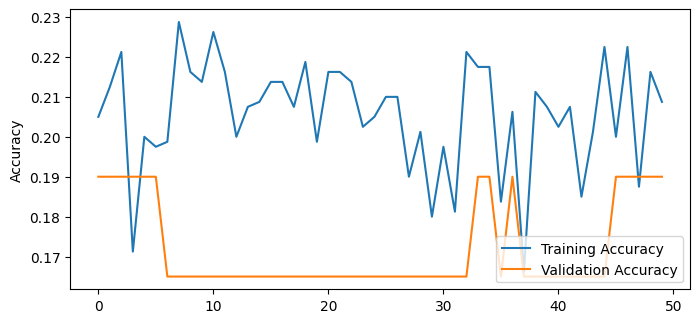

In [ ]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
model.save('../modelh5/model_mfcc.h5')

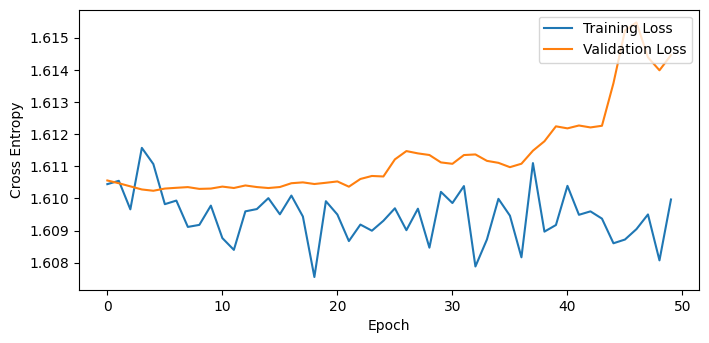

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.show()


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 1s 49ms/step


array([[ 0,  0, 48,  0,  0],
       [ 0,  0, 33,  0,  0],
       [ 0,  0, 38,  0,  0],
       [ 0,  0, 44,  0,  0],
       [ 0,  0, 37,  0,  0]])

In [ ]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.00      0.00      0.00        33
           2       0.19      1.00      0.32        38
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        37

    accuracy                           0.19       200
   macro avg       0.04      0.20      0.06       200
weighted avg       0.04      0.19      0.06       200



/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mamet/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Testing

In [ ]:
model_uri = '../modelh5/model_mfcc.h5'
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 101, 64)           16896     
                                                                 
 dense (Dense)               (None, 101, 32)           2080      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                5

In [ ]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    scaler = StandardScaler()
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


In [ ]:
predict('../data/training/MS/New_MS_003.wav')

1/1 [==============================] - 1s 573ms/step
[0.19148074 0.20976369 0.21084198 0.19379728 0.19411625]
2
Predicted class: MS
